# 1. Instalación e importación de bibliotecas

In [1]:
!git clone https://github.com/angelfergar/ChurnRetention-SP.git

Cloning into 'ChurnRetention-SP'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 36 (delta 9), reused 16 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 2.34 MiB | 7.59 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [24]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [12]:
dataset_path = '/content/ChurnRetention-SP/data/clean_customerChurn.csv'
df = pd.read_csv(dataset_path)

# 2. Preprocesamiento

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

La primera acción que debemos realizar es eliminar la columna Churn Reason debido al alto número de nulls que contiene.



In [14]:
df.drop(columns='Churn Reason', inplace=True)

A continuación, vamos a revisar la información contenida en las columnas no numéricas para ver cómo proceder. Para ellos creamos una función que nos muestra las posibles respuestas para cada columna

In [15]:
# Buscamos los valores únicos de cada columna
def show_uniques(columns):
  for column in columns:
    print(f'{column}: {df[column].unique()}')

# Solo elegimos las columnas que tienen strings
object_columns = df.select_dtypes(include=['object']).columns.tolist()
show_uniques(object_columns)

Gender: ['Male' 'Female']
Senior Citizen: ['No' 'Yes']
Partner: ['No' 'Yes']
Dependents: ['No' 'Yes']
Phone Service: ['Yes' 'No']
Multiple Lines: ['No' 'Yes' 'No phone service']
Internet Service: ['DSL' 'Fiber optic' 'No']
Online Security: ['Yes' 'No' 'No internet service']
Online Backup: ['Yes' 'No' 'No internet service']
Device Protection: ['No' 'Yes' 'No internet service']
Tech Support: ['No' 'Yes' 'No internet service']
Streaming TV: ['No' 'Yes' 'No internet service']
Streaming Movies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'Two year' 'One year']
Paperless Billing: ['Yes' 'No']
Payment Method: ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn Label: ['Yes' 'No']


En base a esta información, haremos:

*   Convertir las columnas 'Yes/No' en integer

*   Aplicar One Hot Encoding en aquellas columnas que tienen respuestas diferentes a 'Yes/No'

Por parte de las columnas cuantitativas:

*   Búsqueda de posibles outliers

*   Aplicar normalización





## 2.1 String to int

In [17]:
# Creamos una función para hacer la transformación de string a int con una única operación
def str_to_int(column):
  df[column] = df[column].map({'No':0, 'Yes':1}).astype(int)

In [18]:
# Creamos una variable con todas las columnas que contienen Yes/No únicamente como respuesta y le aplicamos la función str_to_int
string_columns = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing', 'Churn Label']

for column in string_columns:
  str_to_int(column)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   int64  
 2   Partner            7043 non-null   int64  
 3   Dependents         7043 non-null   int64  
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   int64  
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   int64  
 16  Payment Method     7043 

In [20]:
df.head(5)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
1,Female,0,0,1,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
2,Female,0,0,1,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
3,Female,0,1,1,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
4,Male,0,0,1,49,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1


## 2.2 One Hot Encoding

La siguiente acción será aplicar la técnica de One Hot Encoder para crear columnas binarias para cada categoría de las columnas categóricas del dataset. Estas columnas son Gender, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies, Contract y Payment Method.


In [21]:
# Creamos una función que nos permita ejecutar el OHE con una única acción
def one_hot_encoder(dataframe, column):
  dataframe = pd.get_dummies(dataframe, columns = [column], dtype='int', drop_first=True)
  return dataframe

In [22]:
# Creamos una variable para todas con todas las columnas sobre las que aplicaremos el One Hot Encoding
cat_columns = ['Gender', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
               'Streaming Movies', 'Contract', 'Payment Method']

for column in cat_columns:
  df = one_hot_encoder(df, column)

In [23]:
df.head()

,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Churn Label,Gender_Male,...,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,0,0,2,1,1,53.85,108.15,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,2,1,1,70.70,151.65,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8,1,1,99.65,820.50,1,0,...,0,0,1,0,1,0,0,0,1,0
3,0,1,1,28,1,1,104.80,3046.05,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,0,1,49,1,1,103.70,5036.30,1,1,...,0,0,1,0,1,0,0,0,0,0


## 2.3 Detección de outliers

Comprobamos con un gráfico de bigotes si existen outliers en las columnas de permanencia y costes.

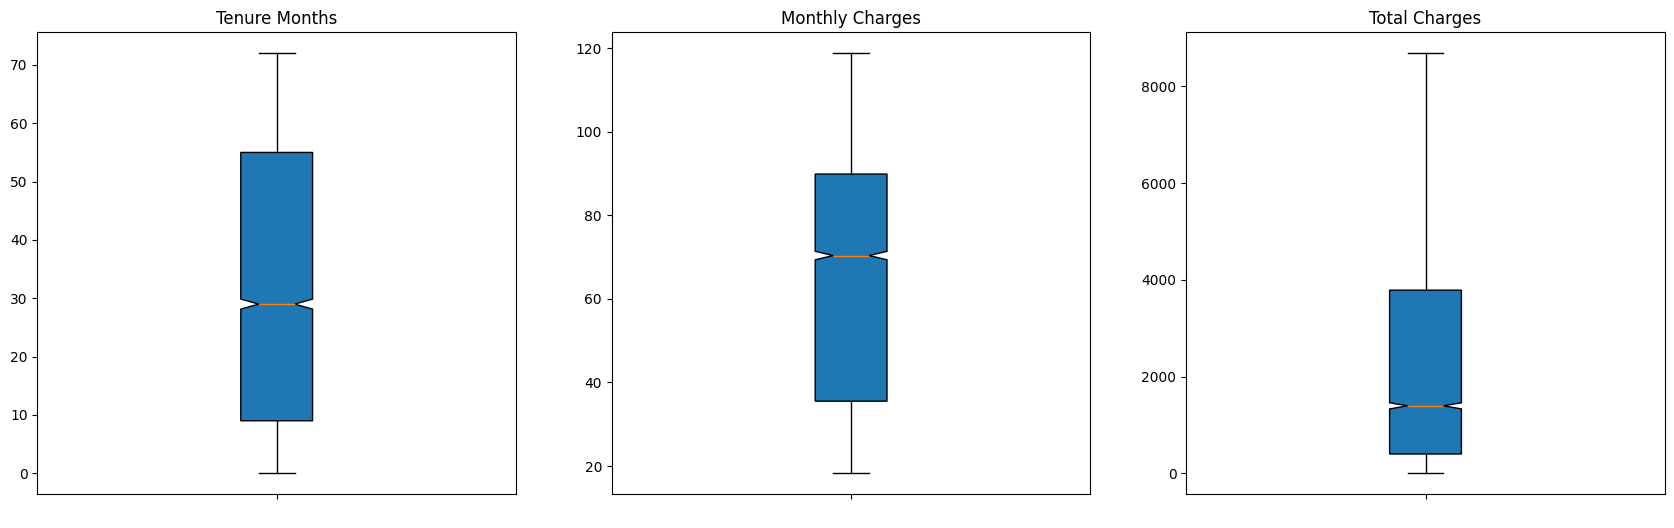

In [26]:
# Creamos 3 gráficos para Tenure Months, Monthly Charges y Total Charges
fig, ax = plt.subplots(1, 3, figsize=(21,6))
ax[0].boxplot(df['Tenure Months'], patch_artist=True, notch=True, tick_labels=' ')
ax[0].set_title('Tenure Months')

ax[1].boxplot(df['Monthly Charges'], patch_artist=True, notch=True, tick_labels=' ')
ax[1].set_title('Monthly Charges')

ax[2].boxplot(df['Total Charges'], patch_artist=True, notch=True, tick_labels=' ')
ax[2].set_title('Total Charges')

plt.show()

No hay outliers que tratar en estas columnas, por lo que podemos proseguir con su normalización.

## 2.4 Normalización

En este paso ajustaremos los valores de Tenure Months, Monthly Charges y Total Charges, escalándolos a un rango entre 0 y 1.
Al igual que con el resto de tareas, crearemos una función para aplicar la normalización sobre todas las columnas con una sola operación.


In [28]:
# Función para aplicar normalización
def normalize_values(column, dataframe):
  dataframe[column] = (dataframe[column] - np.min(dataframe[column]))/ (np.max(dataframe[column]) - np.min(dataframe[column]))
  return dataframe

In [29]:
# Creamos una variable con las columnas cuantitativas y aplicamos la normalización
norm_columns = ['Tenure Months', 'Monthly Charges', 'Total Charges']

for column in norm_columns:
  normalize_values(column, df)

In [30]:
df.head()

,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Churn Label,Gender_Male,...,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,0,0,0.027778,1,1,0.354229,0.012453,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0.027778,1,1,0.521891,0.017462,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0.111111,1,1,0.809950,0.094475,1,0,...,0,0,1,0,1,0,0,0,1,0
3,0,1,1,0.388889,1,1,0.861194,0.350733,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,0,1,0.680556,1,1,0.850249,0.579898,1,1,...,0,0,1,0,1,0,0,0,0,0


## 2.5 Equilibrado de datos

En el siguiente paso, vamos a visualizar el porcentaje de abandonos que hay en los datos totales. Con esta información, veremos si es necesario aplicar técnicas de equilibrado de datos sobre el dataset.

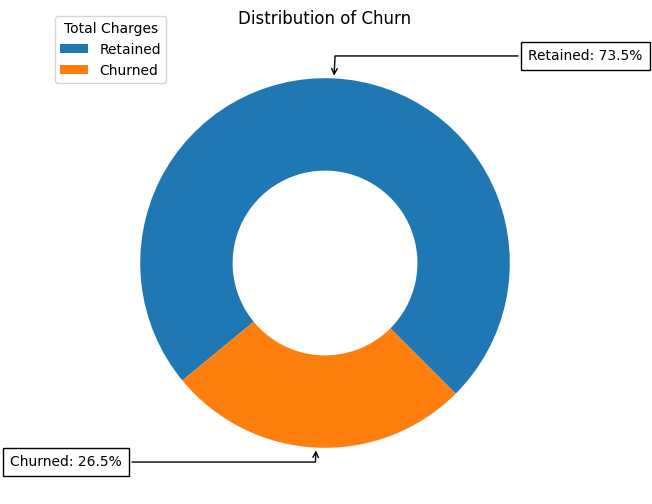

In [31]:
counts = df['Churn Label'].value_counts()

# Preparar etiquetas y datos
labels = ['Retained', 'Churned']
data = counts.values

# Crear el gráfico de pastel
plt.figure(figsize=(12, 6))
slices, texts = plt.pie(data, wedgeprops=dict(width=0.5), startangle=-45)
plt.legend(slices, labels, title=column, loc='upper left', bbox_to_anchor=(-0.1, 0, 0.25, 1.05))

text_box = dict(boxstyle='square,pad=0.5', fc='w')
kw = dict(arrowprops=dict(arrowstyle='->'),
        bbox=text_box, va='baseline')

for i, p in enumerate(slices):
# Calculamos el porcentaje de cada sección
    percentage = data[i] / sum(data) * 100
    percentage_text = f'{percentage:1.1f}%'

    angle = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))
# Elegimos cómo queremos alinear las anotaciones
    horizontalalignment = {-1: 'right', 1: 'left'}[int(np.sign(x))]

    connectionstyle = f'angle,angleA=0,angleB={angle}'
    kw['arrowprops'].update({'connectionstyle': connectionstyle})

# Mostramos las anotaciones y los porcentajes
    plt.annotate(f'{labels[i]}: {percentage_text}', xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y),
                horizontalalignment=horizontalalignment, **kw)

plt.title('Distribution of Churn')

plt.show()

La distribución de los valores de Churn Label es de 2.75:1.
Este tipo de desequilibrios puede dar lugar a resultados sesgados hacia la clase
mayoritaria en nuestro modelo.

Para solucionar este problema vamos a aplicar diferentes técnicas de equilibrado de datos. Tendremos que buscar que la proporción de las clases sea
lo más cercana a 1:1 sin perder una gran cantidad de datos y evitando el sesgo del modelo hacia clase mayoritaria. Para ello, deberemos preparar los dataset de train y aplicar SMOTE y RandomUnderSampler sobre estos.


# 3. Exportación del dataset

In [64]:
df.to_csv('/content/ChurnRetention-SP/data/preprocessed_customerChurn.csv', index=False)

In [73]:
%cd /content/ChurnRetention-SP

/content/ChurnRetention-SP


In [76]:
!git add data/preprocessed_customerChurn.csv

In [ ]:
!git commit -m 'Preprocessed dataset added'